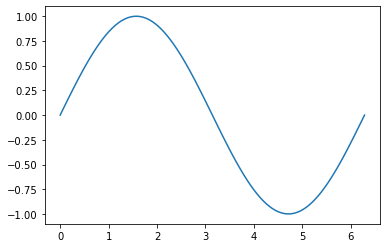

In [10]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import random

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In this Ex we will try to demonstrate the bias/variance decomposition.<br/>
plot the sin function in blue.
Choose 100 two points from x and evaluate the line g(x) from those points and plot them in green.<br/>
(you can use numpy polyfit to find the best fit).
print all of  E<sub>x</sub>((g(x)- f(x)<sup>2</sup>) and E<sub>out</sub>(E((g(x)- f(x)<sup>2</sup>))<br/>plot in red the average line and in light blue the line $\pm$ 2*std.
(you can use plt.fill_between to create the blue line)


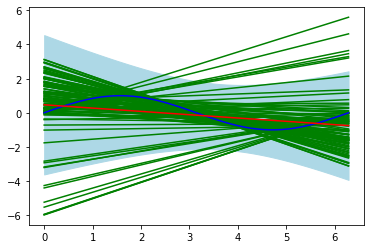

In [11]:
y_t = np.zeros([100,100])
y_mean = np.zeros(100)

for i in range(100):
    g = random.choices(x,k=2)
    y1 = list(np.squeeze([y[np.where(g[0] == x)], y[np.where(g[1] == x)]]))
    a,b = np.polyfit(g,y1,1)
    y_est = a * x + b
    y_t[i,:] = y_est
    y_mean += y_est
    plt.plot(x,y_est, '-', color="green")
    
y_mean = y_mean / 100
plt.fill_between(x, y_mean - 2 * np.std(y_t, 0), y_mean + 2*np.std(y_t,0), color="lightblue")

y = np.sin(x)
plt.plot(x,y, color="blue")

plt.plot(x,y_mean, color="red")
plt.show()

Now we will print the learning curve for a given estimator.
Use Desicion tree classifier from previous exercise and the diabetes dataset.
print the train and test error as a function of the number of training examples.
Use decision trees of sizes 3 and 10.

In [7]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 

In [8]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1,1.0,5)):
    if axes is None:
        axes = plt.subplot()
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples", size=16)
    axes.set_ylabel("Score", size=16)
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes,return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

In [9]:
dataset = read_csv('diabetes.csv')
print(dataset.describe())

       pregenancy      plasma  blood pressure  Triceps thickness  \
count  768.000000  768.000000      768.000000         768.000000   
mean     3.845052  120.894531       69.105469          20.536458   
std      3.369578   31.972618       19.355807          15.952218   
min      0.000000    0.000000        0.000000           0.000000   
25%      1.000000   99.000000       62.000000           0.000000   
50%      3.000000  117.000000       72.000000          23.000000   
75%      6.000000  140.250000       80.000000          32.000000   
max     17.000000  199.000000      122.000000          99.000000   

       serum insulin         BMI  pedigree function         Age   ethnicity  \
count     768.000000  768.000000         768.000000  768.000000  768.000000   
mean       79.799479   31.992578           0.471876   33.240885    1.000000   
std       115.244002    7.884160           0.331329   11.760232    0.810621   
min         0.000000    0.000000           0.078000   21.000000    0.00

In [10]:
#replace missing data with NaN
zero_not_accepted=['plasma','blood pressure','Triceps thickness','serum insulin','BMI']
for column in zero_not_accepted:
    print(column,(dataset[column] == 0).sum()) #amount of data with 0
    dataset[column] = dataset[column].replace(0, np.NaN) #replace data with nan


print(dataset.describe())

plasma 5
blood pressure 35
Triceps thickness 227
serum insulin 374
BMI 11
       pregenancy      plasma  blood pressure  Triceps thickness  \
count  768.000000  763.000000      733.000000         541.000000   
mean     3.845052  121.686763       72.405184          29.153420   
std      3.369578   30.535641       12.382158          10.476982   
min      0.000000   44.000000       24.000000           7.000000   
25%      1.000000   99.000000       64.000000          22.000000   
50%      3.000000  117.000000       72.000000          29.000000   
75%      6.000000  141.000000       80.000000          36.000000   
max     17.000000  199.000000      122.000000          99.000000   

       serum insulin         BMI  pedigree function         Age   ethnicity  \
count     394.000000  757.000000         768.000000  768.000000  768.000000   
mean      155.548223   32.457464           0.471876   33.240885    1.000000   
std       118.775855    6.924988           0.331329   11.760232    0.810621 

In [28]:
#ToDo:
#split to data and target
X=dataset.iloc[:,:9] # features
y=dataset.iloc[:,9] # class
#print(X)
#print(y)
#split between test and train.
# split 2/3 and 1/3 with random state of 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
# use Imputer to deal with missing values
imputer = SimpleImputer(missing_values=np.NaN,strategy='mean').fit(X_train)
imputer = imputer.fit(X_train) # only do fit on train
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
nimputer = SimpleImputer(missing_values=np.NaN,strategy='mean').fit(X)
nX = nimputer.transform(X)
# use OneHotEncode for categorial data to catogrize 'ethenticity'
X["ethnicity"] = X["ethnicity"].astype('category')
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(X[["ethnicity"]]).toarray())
X = X.join(enc_df)
#normilize values
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)



In [24]:
# With 3
clf3 = tree.DecisionTreeClassifier(max_depth=3)
clf3.fit(X_train,y_train)
# With 10
clf10 = tree.DecisionTreeClassifier(max_depth=10)
clf10.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

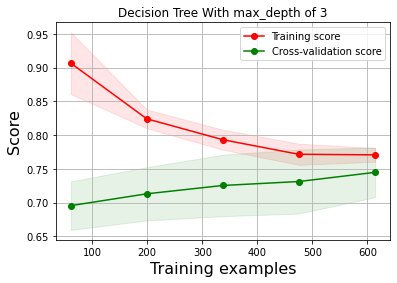

In [29]:
plot_learning_curve(clf3,'Decision Tree With max_depth of 3',nX,y,cv=ShuffleSplit(test_size=0.2))

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

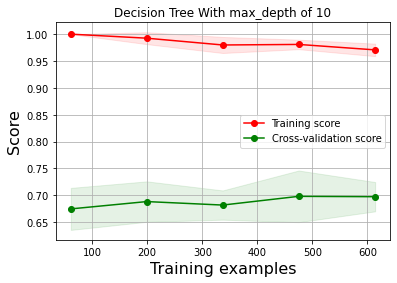

In [30]:
plot_learning_curve(clf10,'Decision Tree With max_depth of 10',nX,y,cv=ShuffleSplit(test_size=0.2))

explain the graph you see - what is your conclusion write below:

print the train and test error as a function of the model complexity (3-10) using all training examples

<ipython-input-8-903184ecf90a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.subplot()
<ipython-input-8-903184ecf90a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.subplot()
<ipython-input-8-903184ecf90a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

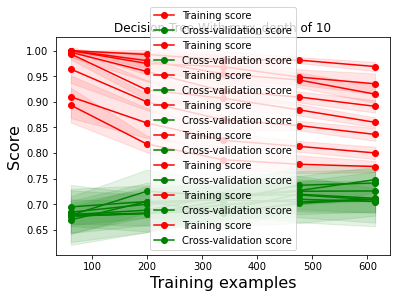

In [35]:
for i in range(3,11):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    plt =  plot_learning_curve(clf,f"Decision Tree With max_depth of {i}",nX,y,cv=ShuffleSplit(test_size=0.2))

what is your conclusion ?

???

Best of luck!